# Lesson 3. Encoding the Board.

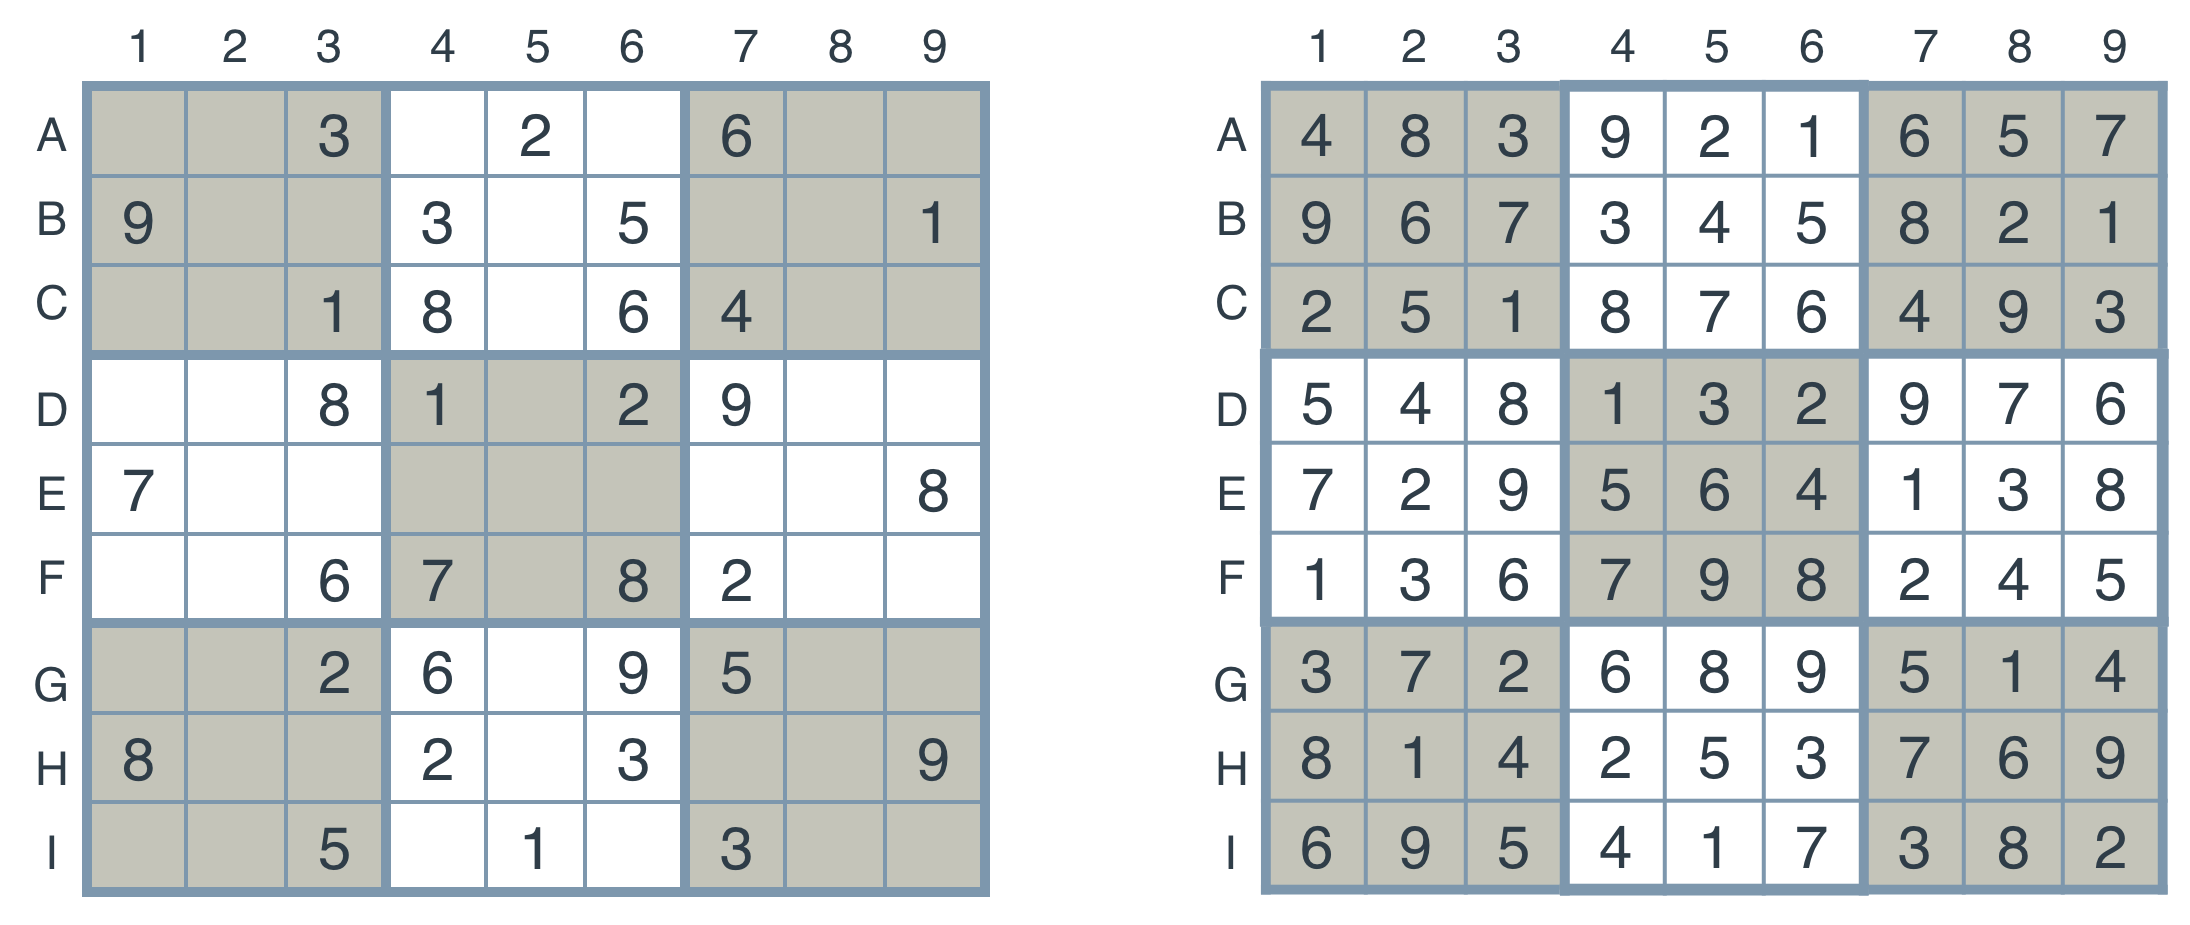

In [160]:
from IPython.core.display import Image, display
display(Image(r'C:\Users\VadymSerpak\Documents\ML\_Udacity_ND\AIND\T1_Project\labels.png'))

Now, in order to implement an agent, let's start by coding the board in Python. Then, we'll code the necessary functions to solve the Sudoku. We'll record the puzzles in two ways — as a string and as a dictionary.

The string will consist of a concatenation of all the readings of the digits in the rows, taking the rows from top to bottom. If the puzzle is not solved, we can use a . as a placeholder for an empty box.

For example, the unsolved puzzle at the above left will be written as: <i>..3.2.6..9..3.5..1..18.64....81.29..7.......8..67.82....26.95..8..2.3..9..5.1.3..</i>

And the solved puzzle at the above right, will be recorded as: <i>483921657967345821251876493548132976729564138136798245372689514814253769695417382</i>

We'll implement the dictionary as follows. The keys will be strings corresponding to the boxes — namely, 'A1', 'A2', ..., 'I9'. The values will either be the digit in each box (if there is one) or a '.' (if not).

So, let's get started. First, we'll record rows and columns as strings.

In [161]:
rows = 'ABCDEFGHI'
cols = '123456789'

In [162]:
def cross(a, b):
    return [s+t for s in a for t in b]

In [163]:
boxes = cross(rows, cols)
print(boxes)
len(boxes)

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9']


81

In [164]:
boxes[0]

'A1'

In [199]:
# Units
row_units = [cross(r,cols) for r in rows]
col_units = [cross(rows,c) for c in cols]
square_units = [cross(rs,cs) for rs in ('ABC','DEF','GHI') for cs in ('123','456','789')]
unitlist = row_units +  col_units + square_units
units = dict((s, [u for u in unitlist if s in u]) for s in boxes)
units.get('A1')

[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9'],
 ['A1', 'B1', 'C1', 'D1', 'E1', 'F1', 'G1', 'H1', 'I1'],
 ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3']]

In [200]:
# Peers
peers = dict((s, set(sum(units[s],[]))-set([s])) for s in boxes)
peers.get('A1')

{'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'B1',
 'B2',
 'B3',
 'C1',
 'C2',
 'C3',
 'D1',
 'E1',
 'F1',
 'G1',
 'H1',
 'I1'}

Now, we're ready to turn the string representation of a sudoku into a dictionary representation. That'll be your turn to shine!

Implement grid_values()
A function to convert the string representation of a puzzle into a dictionary form.
Recall that for the string:

<b>'..3.2.6..9..3.5..1..18.64....81.29..7.......8..67.82....26.95..8..2.3..9..5.1.3..'</b>

...we'd like to return the dictionary:

    {
      'A1': '.'
      'A2': '.',
      'A3': '3',
      'A4': '.',
      'A5': '2',
      ...
      'I9': '.'
    }
    
Implement a function called grid_values() that performs this task.



In [204]:
grid = '4.....8.5.3..........7......2.....6.....8.4......1.......6.3.7.5..2.....1.4......'
#grid_values(grid)
lst = list(enumerate(grid))
lst[0][1]
lst[2][1]

'.'

In [205]:
ind = list(enumerate(boxes))
ind[0][1]
ind[2][1]

'A3'

In [206]:
val = dict((k[1], [v[1] for v in lst][k[0]]) for k in ind)
print(val)

{'A1': '4', 'A2': '.', 'A3': '.', 'A4': '.', 'A5': '.', 'A6': '.', 'A7': '8', 'A8': '.', 'A9': '5', 'B1': '.', 'B2': '3', 'B3': '.', 'B4': '.', 'B5': '.', 'B6': '.', 'B7': '.', 'B8': '.', 'B9': '.', 'C1': '.', 'C2': '.', 'C3': '.', 'C4': '7', 'C5': '.', 'C6': '.', 'C7': '.', 'C8': '.', 'C9': '.', 'D1': '.', 'D2': '2', 'D3': '.', 'D4': '.', 'D5': '.', 'D6': '.', 'D7': '.', 'D8': '6', 'D9': '.', 'E1': '.', 'E2': '.', 'E3': '.', 'E4': '.', 'E5': '8', 'E6': '.', 'E7': '4', 'E8': '.', 'E9': '.', 'F1': '.', 'F2': '.', 'F3': '.', 'F4': '.', 'F5': '1', 'F6': '.', 'F7': '.', 'F8': '.', 'F9': '.', 'G1': '.', 'G2': '.', 'G3': '.', 'G4': '6', 'G5': '.', 'G6': '3', 'G7': '.', 'G8': '7', 'G9': '.', 'H1': '5', 'H2': '.', 'H3': '.', 'H4': '2', 'H5': '.', 'H6': '.', 'H7': '.', 'H8': '.', 'H9': '.', 'I1': '1', 'I2': '.', 'I3': '4', 'I4': '.', 'I5': '.', 'I6': '.', 'I7': '.', 'I8': '.', 'I9': '.'}


In [207]:
def grid_values(grid):
    """Convert grid string into {<box>: <value>} dict with '.' value for empties.

    Args:
        grid: Sudoku grid in string form, 81 characters long
    Returns:
        Sudoku grid in dictionary form:
        - keys: Box labels, e.g. 'A1'
        - values: Value in corresponding box, e.g. '8', or '.' if it is empty.
    """
    lst = list(enumerate(grid))
    ind = list(enumerate(boxes))
    val = dict((k[1], [v[1] for v in lst][k[0]]) for k in ind)
    return val

In [208]:
def display_table(values):
    """
    Display the values as a 2-D grid.
    Input: The sudoku in dictionary form
    Output: None
    """
    width = 1 + max(len(values[s]) for s in boxes)
    line = '+'.join(['-'*(width*3)]*3)
    for r in rows:
        print(''.join(values[r+c].center(width)+('|' if c in '36' else '')
                      for c in cols))
        if r in 'CF': print(line)
    return

In [209]:
values = grid_values(grid)
display_table(values)

4 . . |. . . |8 . 5 
. 3 . |. . . |. . . 
. . . |7 . . |. . . 
------+------+------
. 2 . |. . . |. 6 . 
. . . |. 8 . |4 . . 
. . . |. 1 . |. . . 
------+------+------
. . . |6 . 3 |. 7 . 
5 . . |2 . . |. . . 
1 . 4 |. . . |. . . 


The Udacity solution of the function:

In [210]:
def grid_values(grid):
    """Convert grid string into {<box>: <value>} dict with '.' value for empties.

    Args:
        grid: Sudoku grid in string form, 81 characters long
    Returns:
        Sudoku grid in dictionary form:
        - keys: Box labels, e.g. 'A1'
        - values: Value in corresponding box, e.g. '8', or '.' if it is empty.
    """
    assert len(grid) == 81, "Input grid must be a string of length 81 (9x9)"
    return dict(zip(boxes, grid))

<b>zip(*iterables)</b>
Make an iterator that aggregates elements from each of the iterables.

Returns an iterator of tuples, where the i-th tuple contains the i-th element from each of the argument sequences or iterables. The iterator stops when the shortest input iterable is exhausted. With a single iterable argument, it returns an iterator of 1-tuples. With no arguments, it returns an empty iterator. 

The left-to-right evaluation order of the iterables is guaranteed. This makes possible an idiom for clustering a data series into n-length groups using zip(*[iter(s)]*n).

zip() should only be used with unequal length inputs when you don’t care about trailing, unmatched values from the longer iterables. If those values are important, use itertools.zip_longest() instead.

zip() in conjunction with the * operator can be used to unzip a list:

    >> x = [1, 2, 3]
    >> y = [4, 5, 6]
    >> zipped = zip(x, y)
    >> list(zipped)
    [(1, 4), (2, 5), (3, 6)]
    >> x2, y2 = zip(*zip(x, y))
    >> x == list(x2) and y == list(y2)
    True

Insight: We can eliminate possible values for a box by looking at its peers
Ok, time to start solving the Sudoku!

First things first, let's look at a box and analyze the values that could go in there.

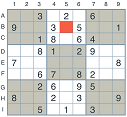

In [211]:
display(Image(r'C:\Users\VadymSerpak\Documents\ML\_Udacity_ND\AIND\T1_Project\reduce-values.png'))

The possible values are 4 and 7. What did we do to figure this out? Well, all the other values already appear either in the same column, row, or 3x3 square of the highlighted box, so we conclude that they can't be a value for this box. In other words, we used the following strategy.

# Lesson 5. Strategy 1: Elimination.

<b>If a box has a value assigned, then none of the peers of this box can have this value.</b>


Now that we know how to eliminate values, we can take one pass, go over every box that has a value, and eliminate the values that can't appear on the box, based on its peers. Once we do so, the board looks like this (for clarity, we've highlighted the original filled-in boxes in bold lettering):

(Notice that if we take a second pass through the puzzle, we can gain even more information, but this is not necessary for now.)

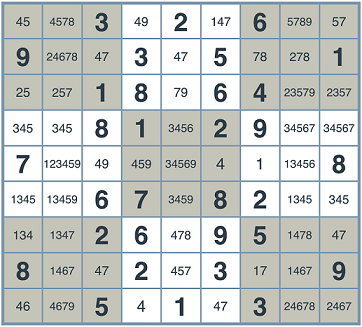

In [212]:
display(Image(r'C:\Users\VadymSerpak\Documents\ML\_Udacity_ND\AIND\T1_Project\values-easy.png'))

<b>Improved <i>grid_values()</i></b>

As of now, we are recording the puzzles in dictionary form, where the keys are the boxes ('A1', 'A2', ... , 'I9') and the values are either the value for each box (if a value exists) or '.' (if the box has no value assigned yet). What we really want is for each value to represent all the available values for that box. For example, the box in the second row and fifth column above will have key 'B5' and value '47' (because 4 and 7 are the only possible values for it). The starting value for every empty box will thus be '123456789'.

Update the grid_values() function to return '123456789' instead of '.' for empty boxes.

In [213]:
def grid_values(grid):
    """Convert grid string into {<box>: <value>} dict with '.' value for empties.

    Args:
        grid: Sudoku grid in string form, 81 characters long
    Returns:
        Sudoku grid in dictionary form:
        - keys: Box labels, e.g. 'A1'
        - values: Value in corresponding box, e.g. '8', or '.' if it is empty.
    """
    lst = list(enumerate(grid))
    ind = list(enumerate(boxes))
    num = '123456789'
    for i in range(len(lst)):
        if lst[i][1] == '.':
            lst[i] = (i,num)
    val = dict((k[1], [v[1] for v in lst][k[0]]) for k in ind)
    return val

In [214]:
# The Udacity solution:
def grid_values_ud(grid):
    """Convert grid string into {<box>: <value>} dict with '123456789' value for empties.

    Args:
        grid: Sudoku grid in string form, 81 characters long
    Returns:
        Sudoku grid in dictionary form:
        - keys: Box labels, e.g. 'A1'
        - values: Value in corresponding box, e.g. '8', or '123456789' if it is empty.
    """
    values = []
    all_digits = '123456789'
    for c in grid:
        if c == '.':
            values.append(all_digits)
        elif c in all_digits:
            values.append(c)
    assert len(values) == 81
    return dict(zip(boxes, values))

In [215]:
values = grid_values(grid)
display_table(values)

    4     123456789 123456789 |123456789 123456789 123456789 |    8     123456789     5     
123456789     3     123456789 |123456789 123456789 123456789 |123456789 123456789 123456789 
123456789 123456789 123456789 |    7     123456789 123456789 |123456789 123456789 123456789 
------------------------------+------------------------------+------------------------------
123456789     2     123456789 |123456789 123456789 123456789 |123456789     6     123456789 
123456789 123456789 123456789 |123456789     8     123456789 |    4     123456789 123456789 
123456789 123456789 123456789 |123456789     1     123456789 |123456789 123456789 123456789 
------------------------------+------------------------------+------------------------------
123456789 123456789 123456789 |    6     123456789     3     |123456789     7     123456789 
    5     123456789 123456789 |    2     123456789 123456789 |123456789 123456789 123456789 
    1     123456789     4     |123456789 123456789 123456789 |12345678

<b>Implement <i>eliminate()</i></b>


Now, let's finish the code for the function eliminate(), which will take as input a puzzle in dictionary form. The function will iterate over all the boxes in the puzzle that only have one value assigned to them, and it will remove this value from every one of its peers.

In [216]:
print(peers['A1'])
type(peers)
type(peers['A1'])

{'F1', 'B1', 'G1', 'C2', 'D1', 'B3', 'A2', 'A9', 'C3', 'A8', 'E1', 'B2', 'A5', 'A4', 'C1', 'H1', 'I1', 'A6', 'A3', 'A7'}


set

In [217]:
def eliminate(values):
    """Eliminate values from peers of each box with a single value.

    Go through all the boxes, and whenever there is a box with a single value,
    eliminate this value from the set of values of all its peers.

    Args:
        values: Sudoku in dictionary form.
    Returns:
        Resulting Sudoku in dictionary form after eliminating values.
    """
# Ther will be some issues with my solution later in reduce-puzzle()
# TODO !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    num = '123456789'
    max_len = len(num)
    for ind, box in enumerate(boxes):
        if values[box] == num:
            num_box = num
#            print("\n{} {}".format(boxes[ind],val[box]))
#            print(peers[boxes[ind]])
            for peer_val in (peers[boxes[ind]]):
                if len(val[peer_val]) < max_len:
#                    print('\n{} {}   {}'.format(val[peer_val],num.index(str(val[peer_val])),num_box))
                    try:
                        num_box = ''.join([num_box[i] for i in range(len(num_box)) if i != num_box.index(str(val[peer_val]))])
                    except ValueError:
                        continue
#                    print(num_box)
                    values[boxes[ind]] = num_box

    """ UDACITY SOLUTION """
    solved_values = [box for box in values.keys() if len(values[box]) == 1]
    for box in solved_values:
        digit = values[box]
        for peer in peers[box]:
            values[peer] = values[peer].replace(digit,'')
    
    return values
display_table(eliminate(values))

   4      1679   12679  |  139     2369    1269  |   8      1239     5    
 26789     3    1256789 | 14589   24569  1245689 | 12679    1249   124679 
  2689   15689   125689 |   7     234569 1245689 | 12369   12349   123469 
------------------------+------------------------+------------------------
  3789     2     135789 |  3459   34579    4579  | 13579     6     13789  
  3679   15679   135679 |  359      8     25679  |   4     12359   12379  
 36789   456789  356789 |  3459     1     245679 | 23579   23589   23789  
------------------------+------------------------+------------------------
  289      89     289   |   6      459      3    |  1259     7     12489  
   5      6789   36789  |   2      479    14789  |  1369   13489   134689 
   1      6789     4    |  589     579     5789  | 23569   23589   23689  


Let's actually look more carefully at the top 3x3 square in the center, highlighted in red.

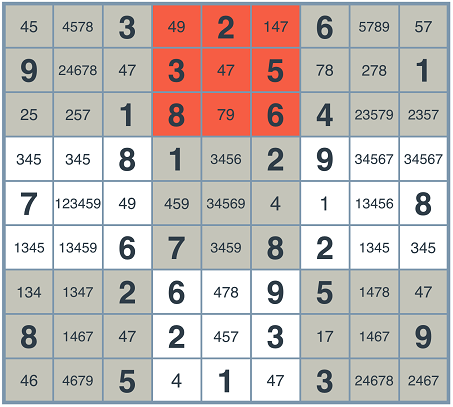

In [218]:
display(Image(r'C:\Users\VadymSerpak\Documents\ML\_Udacity_ND\AIND\T1_Project\highlighted-unit.png'))

# Lesson 6. Strategy 2: Only Choice.

<b>If there is only one box in a unit which would allow a certain digit, then that box must be assigned that digit.</b>

Time to code it! In the next quiz, finish the code for the function only_choice, which will take as input a puzzle in dictionary form. The function will go through all the units, and if there is a unit with a digit that only fits in one possible box, it will assign that digit to that box.

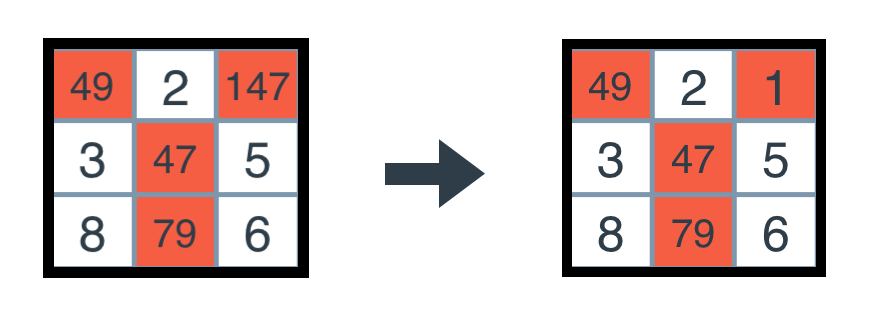

In [219]:
display(Image(r'C:\Users\VadymSerpak\Documents\ML\_Udacity_ND\AIND\T1_Project\only-choice.png'))

In [220]:
def only_choice(values):
    """Finalize all values that are the only choice for a unit.

    Go through all the units, and whenever there is a unit with a value
    that only fits in one box, assign the value to this box.

    Input: Sudoku in dictionary form.
    Output: Resulting Sudoku in dictionary form after filling in only choices.
    """
    for unit in unitlist:
        for digit in '123456789':
            dplaces = [box for box in unit if digit in values[box]]
            if len(dplaces) == 1:
                values[dplaces[0]] = digit
    return values

In [221]:
values = only_choice(values)
display_table(values)

   4      1679   12679  |  139     2369    1269  |   8      1239     5    
 26789     3    1256789 | 14589   24569  1245689 | 12679    1249   124679 
  2689   15689   125689 |   7     234569 1245689 | 12369   12349   123469 
------------------------+------------------------+------------------------
  3789     2     135789 |  3459   34579    4579  | 13579     6     13789  
  3679   15679   135679 |  359      8     25679  |   4     12359   12379  
 36789     4     356789 |  3459     1     245679 | 23579   23589   23789  
------------------------+------------------------+------------------------
  289      89     289   |   6      459      3    |  1259     7     12489  
   5      6789     3    |   2      479      1    |  1369   13489   134689 
   1      6789     4    |  589     579     5789  | 23569   23589   23689  


# Lesson 7. Constraint Propagation.

If you've made it this far, you've already gained hands on exposure to a powerful technique in AI - Constraint Propagation. Constraint Propagation is all about using local constraints in a space (in the case of Sudoku, the constraints of each square) to dramatically reduce the search space. As we enforce each constraint, we see how it introduces new constraints for other parts of the board that can help us further reduce the number of possibilities. We have an entire lesson devoted to Constraint Propagation but let's quickly see some other famous AI problems it helps us solve.

### Map Coloring

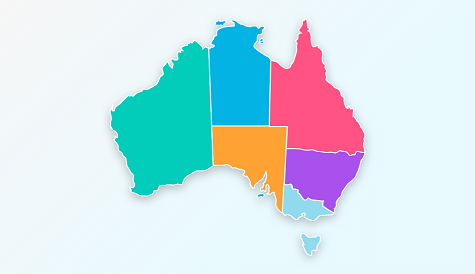

In [222]:
display(Image(r'C:\Users\VadymSerpak\Documents\ML\_Udacity_ND\AIND\T1_Project\map-coloring.png'))

In the map coloring problem, we must find a way to color the map such that no two adjacent items share the same color. Indeed, we'll see how we use constraint propagation to use this simple constraint to find a solution just as we use such constraints to solve Sudoku.

### Crypto-Arithmetic Puzzles

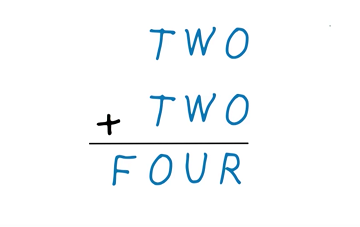

In [223]:
display(Image(r'C:\Users\VadymSerpak\Documents\ML\_Udacity_ND\AIND\T1_Project\screen-shot-2017-01-22-at-12.20.03-pm.png'))

In the above, what digits do T, W, O, F, U, and R represent?

In Crypto-Arithmetic puzzles, each letter represents a digit, and no two letters represent the same digit. None of the numbers start with a leading zero. Our goal is to find a mapping from letters to digits that satisfies the equations. Here again, we'll find that the constraints imposed by the equation allow us to create an intelligent algorithm to solve the problem via Constraint Propagation.

## Applying Constraint Propagation to Sudoku

Now that you see how we apply Constraint Propagation to this problem, let's try to code it! In the following quiz, combine the functions <b>eliminate</b> and <b>only_choice</b> to write the function <b>reduce_puzzle</b>, which receives as input an unsolved puzzle and applies our two constraints repeatedly in an attempt to solve it.

Some things to watch out for:

- The function needs to stop if the puzzle gets solved. How to do this?
- What if the function doesn't solve the sudoku? Can we make sure the function quits when applying the two strategies stops making progress?

In [224]:
values.keys()

dict_keys(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9'])

In [225]:
def reduce_puzzle(values):
    stalled = False
    while not stalled:
        # Check how many boxes have a determined value
        solved_values_before = len([box for box in values.keys() if len(values[box]) == 1])

        # Your code here: Use the Eliminate Strategy
        values = eliminate(values)
        # Your code here: Use the Only Choice Strategy
        values = only_choice(values)
        # Check how many boxes have a determined value, to compare
        solved_values_after = len([box for box in values.keys() if len(values[box]) == 1])
        # If no new values were added, stop the loop.
        stalled = solved_values_before == solved_values_after
        # Sanity check, return False if there is a box with zero available values:
        if len([box for box in values.keys() if len(values[box]) == 0]):
            return False
    return values
display_table(reduce_puzzle(values))

   4      1679   12679  |  139     2369    269   |   8      1239     5    
 26789     3    1256789 | 14589   24569   245689 | 12679    1249   124679 
  2689   15689   125689 |   7     234569  245689 | 12369   12349   123469 
------------------------+------------------------+------------------------
  3789     2     15789  |  3459   34579    4579  | 13579     6     13789  
  3679   15679   15679  |  359      8     25679  |   4     12359   12379  
 36789     4     56789  |  359      1     25679  | 23579   23589   23789  
------------------------+------------------------+------------------------
  289      89     289   |   6      459      3    |  1259     7     12489  
   5      6789     3    |   2      479      1    |   69     489     4689  
   1      6789     4    |  589     579     5789  | 23569   23589   23689  


## Lesson 8. Harder Sudoku.